 # Ordinary least squares Linear Regression.

In [574]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression

In [575]:
boston = load_boston()
df = pd.DataFrame(boston.data, columns=boston['feature_names'])

In [576]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [577]:
df.shape

(506, 13)

In [578]:
X = np.array(df['RM']).reshape(506,1)
y = np.array(boston.target)

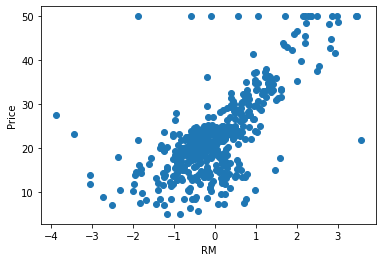

In [583]:
plt.scatter(X,y)
plt.xlabel('RM')
plt.ylabel("Price")
plt.show()

In [581]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [584]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [585]:
X_train.shape
y_train.shape

(404,)

In [586]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [587]:
print(lr.coef_)
print(lr.intercept_)

[6.14136178]
22.434845930185997


In [588]:
y_pred = lr.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.633543994842449

# Simple Gradient Descent Linear Regression From Scratch

In [589]:
class GDRegressor:
    
    def __init__(self,learning_rate,epochs):
        self.m = 0
        self.b = 0
        
        self.lr = learning_rate
        self.epochs = epochs
        
    def fit(self,X,y):
        for i in range(self.epochs):
            # calcualte the b using GD
            loss_slope_b = -2 * np.sum(y - self.m*X.ravel() - self.b)
            # calcualte the m using GD
            loss_slope_m = -2 * np.sum((y - self.m*X.ravel() - self.b)*X.ravel())
            
            self.b = self.b - (self.lr * loss_slope_b)
            self.m = self.m - (self.lr * loss_slope_m)
        print(self.m,self.b)
        
    def predict(self,X):
        return self.m * X + self.b

In [605]:
gd = GDRegressor(0.001,10)

In [606]:
gd.fit(X_train,y_train)

6.1413613792386705 22.434844421042055


In [607]:
y_pred = gd.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.6335439656286757